# Examining ice sheet data in python with `Pandas`
## Part 2: Exploring AWS18 Data

### Overview

In this notebook, we'll:
1. Explore reading a csv file to create a `pandas.DataFrame`
2. Have `pandas` index the DataFrame based on a date/time field and interpret the dates
3. Use `pandas` functions to summarize, plot, and subset data.
4. Create new fields in our `DataFrame` by assessing whether particular criteria are met in a given row. 


Data source: https://doi.pangaea.de/10.1594/PANGAEA.910480

Local file: `data/IMAU_aws18_high-res_meteo_daily.csv`

These data are daily means generated from higher-resolution (2-hourly) AWS observations and SEB model results from AWS18 on Larsen Ice Shelf. They were previously used this semester in Assignment 2.

#### To start, import some python packages and specify some options:

In [1]:
# for data reading
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# seaborn adds some extra visual appeal to our plots
import seaborn as sns

# set some universal plot settings here
plt.rcParams["figure.dpi"] = 200 # default plot dpi
sns.set_style('darkgrid') # see: https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_context("notebook", font_scale=0.65) 
%config InlineBackend.figure_format = 'retina' # make high res plots for high res displays

#### Let's check out the data before we read it:


In [2]:
# First, tell Jupyter where to find the csv data:
aws18_datafile = 'data/IMAU_aws18_high-res_meteo_daily.csv'

# and let's explore quickly before reading with pandas
!head $aws18_datafile

Date/Time,TTT [°C] (at 2m height),THETA [K] (at 2m height),Surf temp [°C] (modelled),Surf temp [°C] (calculated from LWU),Humidity spec [g/kg] (at 2m height),Humidity spec [g/kg] (at surface),RH [%] (at 2m height),ff [m/s] (at 10m height),PPPP [hPa] (at surface),Cloud cov [%],Albedo [%] (24-hour running mean observed...),SZA [deg],Melt energy [W/m**2],Net SW [W/m**2],SWD [W/m**2],SWU [W/m**2],Net LW [W/m**2],LWD [W/m**2],LWU [W/m**2] (modelled),LWU [W/m**2] (observed),NET [W/m**2],Qh [W/m**2],Qe [W/m**2],Ground heat flux [W/m**2],"Melt rate [mm w.e.] (surface melt, within dt)","Melt rate [mm w.e.] (cumulative surface melt, with...)",Runoff [mm] (within dt),Sublimation [mm w.e.] (within dt)
2014-11-25,-5.133983333333334,269.4473333333333,-3.5486333333333335,-3.9354400000000007,2.0831166666666667,2.8884749999999997,82.76647166666667,4.200433333333334,981.5250000000001,0.880915,0.853365,0.9935583333333334,0.0,69.82266666666666,475.01433333333335,405.1916666666666,-10.867315,288.698655,299

#### We can see that the data are separated by commas and have a Date/Time column, so let's read the file and use that as an index column. 

Let's also set tell pandas to read the Date/Time column as actual dates, not just a dumb index using `parse_dates=['Date/Time']`

In [3]:
aws18_df = pd.read_csv(aws18_datafile, index_col=['Date/Time'], parse_dates=['Date/Time'])

In [4]:
# what does the top of this dataframe object look like?
aws18_df.head()

,TTT [°C] (at 2m height),THETA [K] (at 2m height),Surf temp [°C] (modelled),Surf temp [°C] (calculated from LWU),Humidity spec [g/kg] (at 2m height),Humidity spec [g/kg] (at surface),RH [%] (at 2m height),ff [m/s] (at 10m height),PPPP [hPa] (at surface),Cloud cov [%],...,LWU [W/m**2] (modelled),LWU [W/m**2] (observed),NET [W/m**2],Qh [W/m**2],Qe [W/m**2],Ground heat flux [W/m**2],"Melt rate [mm w.e.] (surface melt, within dt)","Melt rate [mm w.e.] (cumulative surface melt, with...)",Runoff [mm] (within dt),Sublimation [mm w.e.] (within dt)
Date/Time,,,,,,,,,,,,,,,,,,,,,
2014-11-25,-5.133983,269.447333,-3.548633,-3.935440,2.083117,2.888475,82.766472,4.200433,981.525000,0.880915,...,299.565970,297.840000,58.955353,-15.439662,-23.443298,-14.194618,0.000000,0.000000,0.0,-0.027977
2014-11-26,-4.961075,269.362954,-4.071096,-4.666950,2.022892,2.868760,79.249010,1.158424,984.812500,0.423192,...,297.567935,294.902217,23.344748,-3.900850,-9.225685,1.701688,0.143363,0.935029,0.0,-0.011770
2014-11-27,-8.898779,265.473296,-7.165762,-8.487525,1.670525,2.180936,89.888640,3.000089,983.993750,0.678223,...,284.048568,278.631250,18.003896,-13.882519,-12.769933,8.450837,0.000000,3.440690,0.0,-0.016392
2014-11-28,-6.506346,268.520525,-5.246775,-6.003121,1.936125,2.568435,85.783101,2.357304,975.752083,0.780218,...,292.242415,289.014583,22.602823,-7.981505,-11.891320,-2.657568,0.000000,3.440690,0.0,-0.015187
2014-11-29,-5.836862,269.417617,-4.415242,-4.665046,2.162189,2.731988,90.351842,2.185494,972.920833,0.902750,...,295.801148,294.689583,23.363843,-9.618969,-11.354539,-2.420010,0.000000,3.440690,0.0,-0.014378


In [5]:
# What about the end?
aws18_df.tail()

,TTT [°C] (at 2m height),THETA [K] (at 2m height),Surf temp [°C] (modelled),Surf temp [°C] (calculated from LWU),Humidity spec [g/kg] (at 2m height),Humidity spec [g/kg] (at surface),RH [%] (at 2m height),ff [m/s] (at 10m height),PPPP [hPa] (at surface),Cloud cov [%],...,LWU [W/m**2] (modelled),LWU [W/m**2] (observed),NET [W/m**2],Qh [W/m**2],Qe [W/m**2],Ground heat flux [W/m**2],"Melt rate [mm w.e.] (surface melt, within dt)","Melt rate [mm w.e.] (cumulative surface melt, with...)",Runoff [mm] (within dt),Sublimation [mm w.e.] (within dt)
Date/Time,,,,,,,,,,,,,,,,,,,,,
2018-12-27,-1.453271,273.181829,-0.729738,0.454773,3.214675,3.661581,93.285777,3.108664,981.093750,0.963929,...,312.295028,317.772727,18.177487,-5.336565,-9.266536,5.467070,0.107889,2070.922647,0.0,-0.011750
2018-12-28,0.054217,274.560508,-0.329904,-0.116121,3.296516,3.772975,86.026648,0.756687,982.812500,0.926511,...,314.120440,315.175368,26.238263,-1.866505,-4.589463,5.027936,0.273057,2074.508467,0.0,-0.005878
2018-12-29,-0.655233,273.855225,-0.715579,-0.117968,3.145089,3.660825,86.370956,1.397704,982.708333,0.796295,...,312.362172,315.188545,33.796998,-1.837256,-5.879820,9.342960,0.390331,2082.058152,0.0,-0.007478
2018-12-30,-0.801163,274.118942,-0.533392,0.269982,3.399680,3.730544,93.208950,4.588902,977.583333,0.971900,...,313.185381,316.897455,13.615356,-3.185713,-9.080472,3.728582,0.063933,2089.131543,0.0,-0.011300
2018-12-31,-2.409079,272.962721,-2.070542,-1.359457,3.088214,3.301234,96.293165,9.532109,971.791667,0.960051,...,306.181136,309.404762,11.796175,-5.753736,-11.355347,5.284123,0.000000,2090.247310,0.0,-0.014557


#### We can also use the .info() function to get some, uh, info about the data 

In [6]:
aws18_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1498 entries, 2014-11-25 to 2018-12-31
Data columns (total 28 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   TTT [°C] (at 2m height)                                 1498 non-null   float64
 1   THETA [K] (at 2m height)                                1498 non-null   float64
 2   Surf temp [°C] (modelled)                               1498 non-null   float64
 3   Surf temp [°C] (calculated from LWU)                    1498 non-null   float64
 4   Humidity spec [g/kg] (at 2m height)                     1498 non-null   float64
 5   Humidity spec [g/kg] (at surface)                       1498 non-null   float64
 6   RH [%] (at 2m height)                                   1498 non-null   float64
 7   ff [m/s] (at 10m height)                                1498 non-null   float64
 8   PPPP [hPa] (at surfa

#### Easy! Let's generate some basic summary information for the data:

In [7]:
aws18_df.describe()

,TTT [°C] (at 2m height),THETA [K] (at 2m height),Surf temp [°C] (modelled),Surf temp [°C] (calculated from LWU),Humidity spec [g/kg] (at 2m height),Humidity spec [g/kg] (at surface),RH [%] (at 2m height),ff [m/s] (at 10m height),PPPP [hPa] (at surface),Cloud cov [%],...,LWU [W/m**2] (modelled),LWU [W/m**2] (observed),NET [W/m**2],Qh [W/m**2],Qe [W/m**2],Ground heat flux [W/m**2],"Melt rate [mm w.e.] (surface melt, within dt)","Melt rate [mm w.e.] (cumulative surface melt, with...)",Runoff [mm] (within dt),Sublimation [mm w.e.] (within dt)
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,...,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.0,1498.000000
mean,-12.098532,262.554140,-12.762487,-12.712267,1.501256,1.778723,83.298364,3.565453,980.209069,0.662984,...,263.058451,263.446027,-1.007326,8.957809,-7.264660,4.443088,0.058144,1284.108359,0.0,-0.009281
std,10.443620,10.563044,9.833491,10.090976,0.998866,1.203858,11.058547,2.804678,10.790423,0.231369,...,38.485103,39.454934,16.830396,24.896649,10.393149,7.676696,0.160891,575.237961,0.0,0.013161
min,-41.071821,231.118392,-40.887592,-42.155700,0.064485,0.066939,44.072866,0.249951,945.904167,0.000000,...,165.014465,161.444444,-66.195479,-24.347538,-83.750230,-26.062843,0.000000,0.000000,0.0,-0.105735
25%,-20.595058,253.863869,-20.589393,-20.961558,0.560805,0.643628,78.498061,1.747823,972.541146,0.494568,...,231.283521,229.702083,-8.655055,-4.438117,-9.400646,0.287300,0.000000,629.334277,0.0,-0.011968
50%,-10.456663,264.132508,-11.156810,-10.878427,1.332266,1.545853,86.766060,2.621558,980.548958,0.710412,...,267.351476,268.655208,0.485062,-0.635923,-4.268851,4.363623,0.000000,1402.268860,0.0,-0.005415
75%,-2.958869,271.869609,-3.443592,-3.171504,2.423061,2.969005,91.315770,4.242596,987.613542,0.864829,...,300.139779,301.487532,8.522801,11.340767,-1.107235,9.193388,0.014231,1794.523406,0.0,-0.001396
max,10.053563,283.774446,0.000000,1.052350,4.234024,3.920060,99.629832,17.184633,1014.614583,0.995198,...,315.636980,320.540200,64.360372,179.164947,27.605505,26.224003,2.064223,2090.247310,0.0,0.005293


#### *What do you think about the range of temperatures at AWS18?*

**

#### But what about those "..." columns?

For extra wide datasets, we need to tell pandas to show us all the data, if that's what we want:

In [8]:
pd.set_option('display.max_columns', None)
aws18_df.describe()

,TTT [°C] (at 2m height),THETA [K] (at 2m height),Surf temp [°C] (modelled),Surf temp [°C] (calculated from LWU),Humidity spec [g/kg] (at 2m height),Humidity spec [g/kg] (at surface),RH [%] (at 2m height),ff [m/s] (at 10m height),PPPP [hPa] (at surface),Cloud cov [%],Albedo [%] (24-hour running mean observed...),SZA [deg],Melt energy [W/m**2],Net SW [W/m**2],SWD [W/m**2],SWU [W/m**2],Net LW [W/m**2],LWD [W/m**2],LWU [W/m**2] (modelled),LWU [W/m**2] (observed),NET [W/m**2],Qh [W/m**2],Qe [W/m**2],Ground heat flux [W/m**2],"Melt rate [mm w.e.] (surface melt, within dt)","Melt rate [mm w.e.] (cumulative surface melt, with...)",Runoff [mm] (within dt),Sublimation [mm w.e.] (within dt)
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.0,1498.000000
mean,-12.098532,262.554140,-12.762487,-12.712267,1.501256,1.778723,83.298364,3.565453,980.209069,0.662984,0.895612,1.561231,5.458156,17.930604,134.625450,116.694846,-18.937930,244.120521,263.058451,263.446027,-1.007326,8.957809,-7.264660,4.443088,0.058144,1284.108359,0.0,-0.009281
std,10.443620,10.563044,9.833491,10.090976,0.998866,1.203858,11.058547,2.804678,10.790423,0.231369,0.050583,0.279578,14.995111,21.302241,122.351123,103.577360,17.908375,33.824073,38.485103,39.454934,16.830396,24.896649,10.393149,7.676696,0.160891,575.237961,0.0,0.013161
min,-41.071821,231.118392,-40.887592,-42.155700,0.064485,0.066939,44.072866,0.249951,945.904167,0.000000,0.654545,0.993558,0.000000,0.124997,1.989760,1.728865,-80.067452,147.979167,165.014465,161.444444,-66.195479,-24.347538,-83.750230,-26.062843,0.000000,0.000000,0.0,-0.105735
25%,-20.595058,253.863869,-20.589393,-20.961558,0.560805,0.643628,78.498061,1.747823,972.541146,0.494568,0.864620,1.278824,0.000000,1.048866,14.984273,14.014714,-30.314283,219.750000,231.283521,229.702083,-8.655055,-4.438117,-9.400646,0.287300,0.000000,629.334277,0.0,-0.011968
50%,-10.456663,264.132508,-11.156810,-10.878427,1.332266,1.545853,86.766060,2.621558,980.548958,0.710412,0.908914,1.554004,0.000000,9.657924,100.631170,90.916667,-14.703805,244.695567,267.351476,268.655208,0.485062,-0.635923,-4.268851,4.363623,0.000000,1402.268860,0.0,-0.005415
75%,-2.958869,271.869609,-3.443592,-3.171504,2.423061,2.969005,91.315770,4.242596,987.613542,0.864829,0.940146,1.841737,1.534051,27.210258,243.516666,213.114583,-4.035276,269.763542,300.139779,301.487532,8.522801,11.340767,-1.107235,9.193388,0.014231,1794.523406,0.0,-0.001396
max,10.053563,283.774446,0.000000,1.052350,4.234024,3.920060,99.629832,17.184633,1014.614583,0.995198,0.950000,1.961295,189.332309,112.345784,475.014333,405.191667,23.740913,334.329353,315.636980,320.540200,64.360372,179.164947,27.605505,26.224003,2.064223,2090.247310,0.0,0.005293


From here on out, we'll get all columns!

#### Let's make a quick plot of 2 meter temperature and surface temperature to see how these relate:

<AxesSubplot:xlabel='Date/Time', ylabel='Temperature [°C]'>

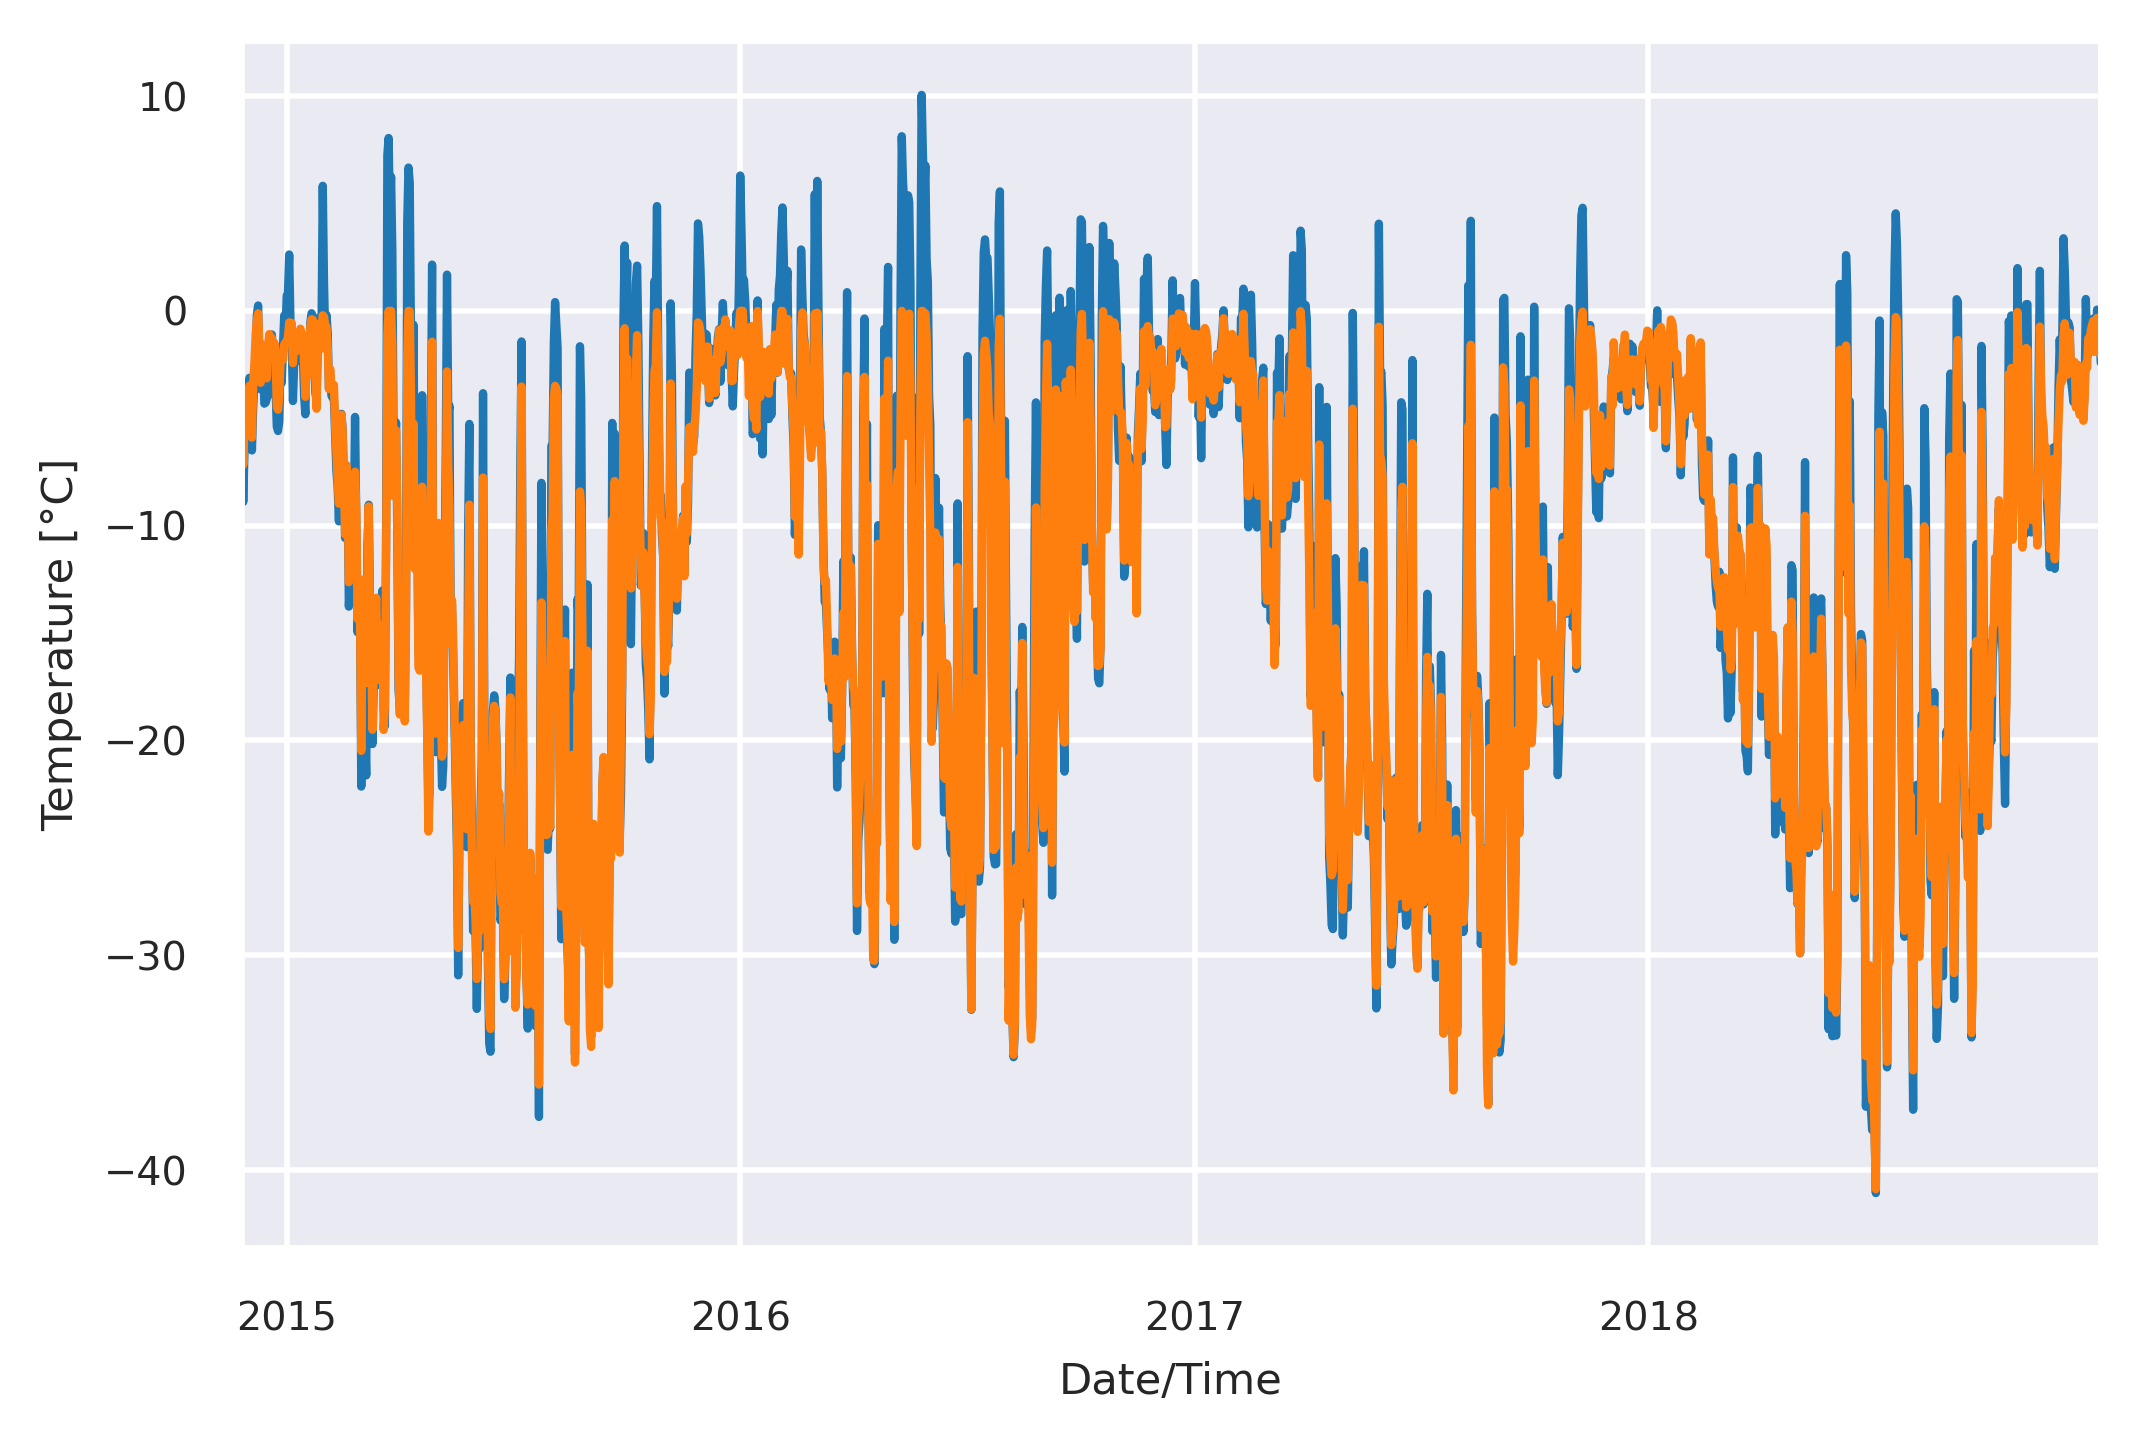

In [9]:
aws18_df['TTT [°C] (at 2m height)'].plot(ylabel='Temperature [°C]')
aws18_df['Surf temp [°C] (modelled)'].plot()

#### *This shows us how the skin (surface) temperature is limited to 0°C. Why?*


And a result, in summer there is typically a near-surface **temperature inversion**: temperature increases with height above the surface.
    
It's also interesting to see that air temperatures > 0°C are an imperfect indicator of surface melt. 
* Note the times that T2m > 0°C, yet the skin temperature is < 0 °C (i.e., not melting despite "warm" air).



***

## What if we wanted to quickly assess what the conditions are when melt is happening?

We can select only the data when melt is occurring according to the SEB model, and show the descriptive statistics for these hours quite easily.

#### To do this, we want to use the `pandas.DataFrame.loc` function:

* Docs here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
* Good examples here: https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/subset-time-series-data-python/

In [10]:
aws18_df.loc[aws18_df['Melt rate [mm w.e.] (surface melt, within dt)']>0].describe()

,TTT [°C] (at 2m height),THETA [K] (at 2m height),Surf temp [°C] (modelled),Surf temp [°C] (calculated from LWU),Humidity spec [g/kg] (at 2m height),Humidity spec [g/kg] (at surface),RH [%] (at 2m height),ff [m/s] (at 10m height),PPPP [hPa] (at surface),Cloud cov [%],Albedo [%] (24-hour running mean observed...),SZA [deg],Melt energy [W/m**2],Net SW [W/m**2],SWD [W/m**2],SWU [W/m**2],Net LW [W/m**2],LWD [W/m**2],LWU [W/m**2] (modelled),LWU [W/m**2] (observed),NET [W/m**2],Qh [W/m**2],Qe [W/m**2],Ground heat flux [W/m**2],"Melt rate [mm w.e.] (surface melt, within dt)","Melt rate [mm w.e.] (cumulative surface melt, with...)",Runoff [mm] (within dt),Sublimation [mm w.e.] (within dt)
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.0,407.000000
mean,-1.129551,273.572516,-2.315628,-2.185805,2.716125,3.294224,77.234099,4.089968,980.322918,0.604437,0.852042,1.322890,20.089233,39.899112,249.456566,209.557454,-31.064092,274.256066,305.320158,305.982146,8.835021,17.492436,-14.712466,7.484404,0.214004,1179.147283,0.0,-0.018880
std,3.033382,3.020324,1.839837,2.107227,0.433396,0.386743,12.153067,3.437211,9.107678,0.215655,0.049459,0.205708,23.117666,24.729487,111.331199,91.037553,18.680121,21.674608,7.904787,9.084547,19.063949,34.944850,14.147976,7.768786,0.249017,617.300126,0.0,0.017712
min,-11.486717,263.112804,-14.076704,-13.882595,1.431274,1.787016,44.072866,0.713963,957.385417,0.038977,0.732502,1.180280,0.000000,0.173243,3.373455,3.187500,-80.067452,219.558150,259.199915,259.838286,-60.076960,-24.347538,-83.275683,-22.072837,0.000181,0.935029,0.0,-0.104530
25%,-2.986133,271.769354,-3.167156,-3.077431,2.433910,3.059894,68.904988,1.698209,973.760417,0.437770,0.814203,1.189910,6.038758,20.813004,195.295168,164.226205,-44.521555,258.221967,301.401839,301.937500,-0.035245,-3.940618,-15.993464,2.752472,0.061077,645.975402,0.0,-0.020561
50%,-1.592817,273.181829,-1.962121,-1.906583,2.685697,3.324519,80.124451,2.742494,979.895833,0.614346,0.852941,1.230071,13.356682,37.822750,275.132305,238.077083,-29.305866,275.270833,306.699724,307.013717,12.218759,0.482554,-10.330631,7.727871,0.142099,1327.638893,0.0,-0.013115
75%,0.340146,275.137467,-1.015546,-0.680852,2.995471,3.590139,86.777666,5.085718,987.019792,0.766944,0.886877,1.349197,26.174307,56.905201,327.976241,277.987521,-16.903049,290.675608,310.993025,312.547617,20.267860,29.338463,-6.729854,12.638597,0.278426,1720.583191,0.0,-0.008587
max,10.053563,283.774446,0.000000,1.052350,4.234024,3.920060,96.580242,16.317408,1003.543750,0.995198,0.950000,1.954643,189.332309,112.345784,428.808695,333.734378,23.740913,334.329353,315.636980,320.540200,64.360372,179.164947,27.605505,25.421952,2.064223,2089.131543,0.0,0.003244


#### *How many days of melt occurred out of the total number?*

#### *Take a look at 2m temperature now. How does this look?*

#### *What about the mean radiative and turbulent fluxes?*

**


### What if we were interested in subsetting by time instead? 

#### Indexing based on our Date/Time index field is easy using `pandas.DataFrame.loc`

For example, what if we just wanted data for summer 2017/18 (December 2017, January 2018, February 2018)?    

In [11]:
aws18_df.loc['2017-12':'2018-02']

,TTT [°C] (at 2m height),THETA [K] (at 2m height),Surf temp [°C] (modelled),Surf temp [°C] (calculated from LWU),Humidity spec [g/kg] (at 2m height),Humidity spec [g/kg] (at surface),RH [%] (at 2m height),ff [m/s] (at 10m height),PPPP [hPa] (at surface),Cloud cov [%],Albedo [%] (24-hour running mean observed...),SZA [deg],Melt energy [W/m**2],Net SW [W/m**2],SWD [W/m**2],SWU [W/m**2],Net LW [W/m**2],LWD [W/m**2],LWU [W/m**2] (modelled),LWU [W/m**2] (observed),NET [W/m**2],Qh [W/m**2],Qe [W/m**2],Ground heat flux [W/m**2],"Melt rate [mm w.e.] (surface melt, within dt)","Melt rate [mm w.e.] (cumulative surface melt, with...)",Runoff [mm] (within dt),Sublimation [mm w.e.] (within dt)
Date/Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-01,-7.563904,267.348417,-7.206533,-6.818028,1.889800,2.177853,91.503812,4.178283,977.114583,0.646248,0.871923,1.201458,0.000000,38.475500,302.808833,264.333333,-24.793209,259.041667,283.834875,285.500000,13.682291,-4.986360,-9.270252,0.577437,0.000000,1769.805240,0.0,-0.011511
2017-12-02,-3.344837,271.373087,-3.053304,-2.457763,2.328935,3.073247,80.272005,2.147311,979.895833,0.596081,0.844137,1.199334,6.726387,55.844274,344.802608,288.958333,-36.128159,265.791000,301.919159,304.606105,19.716117,0.612619,-13.716672,-1.292322,0.063668,1770.182440,0.0,-0.016510
2017-12-03,-2.822850,271.433817,-4.431050,-4.098925,2.130132,2.804390,68.196449,2.901414,985.802083,0.215255,0.809815,1.197318,16.278157,76.222790,389.910290,313.687500,-61.816092,234.231750,296.047842,297.523500,14.406697,10.313528,-12.222130,3.315625,0.173763,1772.190969,0.0,-0.016436
2017-12-04,-2.218242,272.884629,-1.463137,-1.032200,2.947684,3.462509,90.912798,3.935863,975.166667,0.939412,0.900412,1.195414,0.000000,19.990870,264.970037,244.979167,-5.188108,303.750000,308.938108,310.900000,14.802762,-7.567403,-12.349405,4.932543,0.000000,1775.503580,0.0,-0.015681
2017-12-05,-2.956892,272.480225,-2.468921,-2.161944,2.743860,3.230478,89.822080,3.628185,970.916667,0.758044,0.879359,1.193621,12.823331,43.212277,324.253943,281.041667,-21.558362,282.912333,304.470695,305.875000,21.653915,-4.901125,-11.330230,6.301483,0.123081,1776.290620,0.0,-0.013954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-24,-12.730375,262.159421,-12.045517,-11.169324,1.217188,1.376335,94.373285,3.329185,976.958333,0.803978,0.893405,1.404315,0.000000,17.795834,198.240778,180.444944,-8.886718,254.666667,263.553385,267.119048,8.909115,-7.935121,-4.708856,3.669850,0.000000,1890.459690,0.0,-0.005932
2018-02-25,-13.525000,261.128583,-12.587275,-12.161194,1.072485,1.322385,89.701283,0.920171,979.979167,0.747269,0.887598,1.410433,0.000000,19.942019,166.483685,146.541667,-13.929022,247.520833,261.449855,263.205882,6.012997,-4.989973,-3.235277,2.313562,0.000000,1890.459690,0.0,-0.003994
2018-02-26,-13.767267,260.473604,-12.912671,-12.639015,1.004966,1.267228,86.419944,1.822078,985.416667,0.700129,0.881996,1.416598,0.000000,21.378415,183.887278,162.508863,-16.529810,243.572917,260.102727,261.250000,4.848606,-5.806605,-4.655226,5.223128,0.000000,1890.459690,0.0,-0.006017


### Let's get the descriptive stats now for that interval:

In [12]:
aws18_df.loc['2017-12':'2018-02'].describe()

,TTT [°C] (at 2m height),THETA [K] (at 2m height),Surf temp [°C] (modelled),Surf temp [°C] (calculated from LWU),Humidity spec [g/kg] (at 2m height),Humidity spec [g/kg] (at surface),RH [%] (at 2m height),ff [m/s] (at 10m height),PPPP [hPa] (at surface),Cloud cov [%],Albedo [%] (24-hour running mean observed...),SZA [deg],Melt energy [W/m**2],Net SW [W/m**2],SWD [W/m**2],SWU [W/m**2],Net LW [W/m**2],LWD [W/m**2],LWU [W/m**2] (modelled),LWU [W/m**2] (observed),NET [W/m**2],Qh [W/m**2],Qe [W/m**2],Ground heat flux [W/m**2],"Melt rate [mm w.e.] (surface melt, within dt)","Melt rate [mm w.e.] (cumulative surface melt, with...)",Runoff [mm] (within dt),Sublimation [mm w.e.] (within dt)
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,90.000000
mean,-4.446249,270.447256,-4.132095,-3.787393,2.452519,2.876597,88.656382,2.819064,977.651198,0.739458,0.887738,1.250613,5.338211,31.452512,270.004046,238.551534,-20.481962,276.840922,297.322884,298.907841,10.970550,-3.293842,-7.795049,4.960731,0.055926,1839.499471,0.0,-0.009892
std,3.293604,3.434024,3.215468,3.300071,0.549366,0.644326,5.487638,2.084283,6.529097,0.192252,0.037462,0.075915,8.495292,17.676569,61.080559,48.316018,15.941906,21.486206,13.794583,14.195066,7.505222,3.879107,3.709810,5.078665,0.089963,44.941893,0.0,0.004730
min,-15.692763,258.886408,-14.707879,-15.297679,0.930455,1.074612,68.196449,0.910447,960.729167,0.140877,0.792278,1.180284,0.000000,9.815509,131.963585,121.875000,-71.390855,224.062000,252.976387,250.710526,-9.097333,-12.687702,-20.587179,-2.110321,0.000000,1769.805240,0.0,-0.026197
25%,-5.045537,269.482759,-4.883970,-4.919162,2.221911,2.647829,86.544830,1.486984,974.322917,0.614427,0.858241,1.186641,0.000000,17.979368,227.506381,200.270956,-30.139759,258.074292,293.973306,294.089647,5.690122,-5.403926,-10.279087,0.993595,0.000000,1795.113176,0.0,-0.013021
50%,-3.479975,271.593060,-3.178035,-2.681280,2.580977,3.009294,89.705850,2.155704,977.380208,0.804589,0.892219,1.216361,0.000000,25.989601,273.326459,246.848111,-15.733664,282.081167,301.254972,303.521976,11.163094,-3.304143,-7.208871,3.537020,0.000000,1843.965970,0.0,-0.009200
75%,-2.362864,272.766879,-2.072619,-1.667031,2.849875,3.327224,92.385133,3.084442,982.328125,0.888856,0.915084,1.303211,10.055515,38.630041,305.236482,271.896116,-8.271994,294.623854,306.266351,308.028281,14.875138,-1.797464,-4.849812,8.229618,0.105497,1884.448535,0.0,-0.006265
max,0.025925,274.573367,-0.404142,0.113106,3.309164,3.785792,98.274962,13.969080,992.541667,0.982430,0.948568,1.429065,39.553552,82.389476,404.876795,333.020833,1.925880,307.395833,313.779885,316.217412,34.091057,10.313528,-1.783871,18.941194,0.416578,1890.459690,0.0,-0.001995


## How about selecting all Decembers? 

Pandas understands time operators, and since we have a date/time index and told pandas to parse the dates when we read the csv file, we can query for index values based on dates/times:

In [13]:
aws18_df.loc[aws18_df.index.month==12]

,TTT [°C] (at 2m height),THETA [K] (at 2m height),Surf temp [°C] (modelled),Surf temp [°C] (calculated from LWU),Humidity spec [g/kg] (at 2m height),Humidity spec [g/kg] (at surface),RH [%] (at 2m height),ff [m/s] (at 10m height),PPPP [hPa] (at surface),Cloud cov [%],Albedo [%] (24-hour running mean observed...),SZA [deg],Melt energy [W/m**2],Net SW [W/m**2],SWD [W/m**2],SWU [W/m**2],Net LW [W/m**2],LWD [W/m**2],LWU [W/m**2] (modelled),LWU [W/m**2] (observed),NET [W/m**2],Qh [W/m**2],Qe [W/m**2],Ground heat flux [W/m**2],"Melt rate [mm w.e.] (surface melt, within dt)","Melt rate [mm w.e.] (cumulative surface melt, with...)",Runoff [mm] (within dt),Sublimation [mm w.e.] (within dt)
Date/Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-01,-3.836692,271.794962,-3.844167,-3.908779,2.006541,2.965317,72.349628,1.355379,968.400000,0.572237,0.829302,1.201458,19.553367,64.218846,363.612596,299.393750,-35.722608,262.826050,298.548658,298.209367,28.496239,-2.826956,-9.053696,1.752733,0.209553,5.076707,0.0,-0.011462
2014-12-02,-3.116129,272.629333,-3.481758,-3.975362,2.051893,3.032075,68.179340,2.742494,967.066667,0.513804,0.827318,1.199334,18.835516,57.807279,331.298945,273.491667,-40.098571,259.980933,300.079505,297.939900,17.708709,0.948897,-16.306323,14.435545,0.195498,10.171092,0.0,-0.020522
2014-12-03,-5.028158,270.174712,-4.123221,-5.436242,1.820565,2.888571,72.287940,2.186035,973.631250,0.173760,0.793780,1.197318,9.293622,87.830085,411.986335,324.156250,-72.928187,224.409267,297.337454,291.617817,14.901898,-6.220209,-16.231567,15.503544,0.097513,14.222172,0.0,-0.020908
2014-12-04,-6.497300,268.312583,-5.901925,-7.151550,1.596269,2.562393,70.465749,1.225281,978.510417,0.405092,0.824424,1.195414,12.452730,55.587263,342.955725,287.368463,-47.041100,242.787217,289.828317,284.600283,8.546163,-3.800130,-9.652802,13.980860,0.117789,16.733843,0.0,-0.012106
2014-12-05,-4.523529,270.663088,-3.445996,-3.826867,2.115540,3.026917,78.493811,1.292058,973.914583,0.509301,0.809373,1.193621,19.494047,74.283499,374.202249,299.918750,-44.551096,255.704933,300.256030,298.651317,29.732404,-5.153106,-11.286029,4.863123,0.205136,20.080035,0.0,-0.014691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,-1.453271,273.181829,-0.729738,0.454773,3.214675,3.661581,93.285777,3.108664,981.093750,0.963929,0.923763,1.182880,9.814479,21.857929,286.837096,264.979167,-3.680444,308.614583,312.295028,317.772727,18.177487,-5.336565,-9.266536,5.467070,0.107889,2070.922647,0.0,-0.011750
2018-12-28,0.054217,274.560508,-0.329904,-0.116121,3.296516,3.772975,86.026648,0.756687,982.812500,0.926511,0.897709,1.183711,25.271838,30.945204,278.028538,247.083333,-4.706940,309.413500,314.120440,315.175368,26.238263,-1.866505,-4.589463,5.027936,0.273057,2074.508467,0.0,-0.005878
2018-12-29,-0.655233,273.855225,-0.715579,-0.117968,3.145089,3.660825,86.370956,1.397704,982.708333,0.796295,0.842573,1.184654,36.295327,51.969418,310.761085,258.791667,-18.172422,294.189750,312.362172,315.188545,33.796998,-1.837256,-5.879820,9.342960,0.390331,2082.058152,0.0,-0.007478


### What if we wanted to select multiple months, like all DJFs?

One way is to select data where the month index is equal to 12 or 1 or 2.

In python, `|` is a 'bitwise operator' meaning OR:
* https://www.w3schools.com/python/python_operators.asp

In [14]:
# this creates a new dataframe containing a subset of aws18_df where the index month is in D,J, or F.
aws18_djf_df = aws18_df[(aws18_df.index.month==12) | (aws18_df.index.month==1) | (aws18_df.index.month==2)]
aws18_djf_df

,TTT [°C] (at 2m height),THETA [K] (at 2m height),Surf temp [°C] (modelled),Surf temp [°C] (calculated from LWU),Humidity spec [g/kg] (at 2m height),Humidity spec [g/kg] (at surface),RH [%] (at 2m height),ff [m/s] (at 10m height),PPPP [hPa] (at surface),Cloud cov [%],Albedo [%] (24-hour running mean observed...),SZA [deg],Melt energy [W/m**2],Net SW [W/m**2],SWD [W/m**2],SWU [W/m**2],Net LW [W/m**2],LWD [W/m**2],LWU [W/m**2] (modelled),LWU [W/m**2] (observed),NET [W/m**2],Qh [W/m**2],Qe [W/m**2],Ground heat flux [W/m**2],"Melt rate [mm w.e.] (surface melt, within dt)","Melt rate [mm w.e.] (cumulative surface melt, with...)",Runoff [mm] (within dt),Sublimation [mm w.e.] (within dt)
Date/Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-01,-3.836692,271.794962,-3.844167,-3.908779,2.006541,2.965317,72.349628,1.355379,968.400000,0.572237,0.829302,1.201458,19.553367,64.218846,363.612596,299.393750,-35.722608,262.826050,298.548658,298.209367,28.496239,-2.826956,-9.053696,1.752733,0.209553,5.076707,0.0,-0.011462
2014-12-02,-3.116129,272.629333,-3.481758,-3.975362,2.051893,3.032075,68.179340,2.742494,967.066667,0.513804,0.827318,1.199334,18.835516,57.807279,331.298945,273.491667,-40.098571,259.980933,300.079505,297.939900,17.708709,0.948897,-16.306323,14.435545,0.195498,10.171092,0.0,-0.020522
2014-12-03,-5.028158,270.174712,-4.123221,-5.436242,1.820565,2.888571,72.287940,2.186035,973.631250,0.173760,0.793780,1.197318,9.293622,87.830085,411.986335,324.156250,-72.928187,224.409267,297.337454,291.617817,14.901898,-6.220209,-16.231567,15.503544,0.097513,14.222172,0.0,-0.020908
2014-12-04,-6.497300,268.312583,-5.901925,-7.151550,1.596269,2.562393,70.465749,1.225281,978.510417,0.405092,0.824424,1.195414,12.452730,55.587263,342.955725,287.368463,-47.041100,242.787217,289.828317,284.600283,8.546163,-3.800130,-9.652802,13.980860,0.117789,16.733843,0.0,-0.012106
2014-12-05,-4.523529,270.663088,-3.445996,-3.826867,2.115540,3.026917,78.493811,1.292058,973.914583,0.509301,0.809373,1.193621,19.494047,74.283499,374.202249,299.918750,-44.551096,255.704933,300.256030,298.651317,29.732404,-5.153106,-11.286029,4.863123,0.205136,20.080035,0.0,-0.014691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,-1.453271,273.181829,-0.729738,0.454773,3.214675,3.661581,93.285777,3.108664,981.093750,0.963929,0.923763,1.182880,9.814479,21.857929,286.837096,264.979167,-3.680444,308.614583,312.295028,317.772727,18.177487,-5.336565,-9.266536,5.467070,0.107889,2070.922647,0.0,-0.011750
2018-12-28,0.054217,274.560508,-0.329904,-0.116121,3.296516,3.772975,86.026648,0.756687,982.812500,0.926511,0.897709,1.183711,25.271838,30.945204,278.028538,247.083333,-4.706940,309.413500,314.120440,315.175368,26.238263,-1.866505,-4.589463,5.027936,0.273057,2074.508467,0.0,-0.005878
2018-12-29,-0.655233,273.855225,-0.715579,-0.117968,3.145089,3.660825,86.370956,1.397704,982.708333,0.796295,0.842573,1.184654,36.295327,51.969418,310.761085,258.791667,-18.172422,294.189750,312.362172,315.188545,33.796998,-1.837256,-5.879820,9.342960,0.390331,2082.058152,0.0,-0.007478


In [15]:
# what's it look like?
aws18_djf_df.describe()

,TTT [°C] (at 2m height),THETA [K] (at 2m height),Surf temp [°C] (modelled),Surf temp [°C] (calculated from LWU),Humidity spec [g/kg] (at 2m height),Humidity spec [g/kg] (at surface),RH [%] (at 2m height),ff [m/s] (at 10m height),PPPP [hPa] (at surface),Cloud cov [%],Albedo [%] (24-hour running mean observed...),SZA [deg],Melt energy [W/m**2],Net SW [W/m**2],SWD [W/m**2],SWU [W/m**2],Net LW [W/m**2],LWD [W/m**2],LWU [W/m**2] (modelled),LWU [W/m**2] (observed),NET [W/m**2],Qh [W/m**2],Qe [W/m**2],Ground heat flux [W/m**2],"Melt rate [mm w.e.] (surface melt, within dt)","Melt rate [mm w.e.] (cumulative surface melt, with...)",Runoff [mm] (within dt),Sublimation [mm w.e.] (within dt)
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.0,392.000000
mean,-3.350459,271.404946,-3.293690,-3.159642,2.537738,3.060394,84.577420,2.849477,979.493504,0.688971,0.866524,1.245501,11.858406,39.264967,277.896552,238.631585,-25.538930,275.449743,300.988673,301.672821,13.726037,-0.672661,-10.116238,8.263728,0.126241,1175.712169,0.0,-0.012881
std,3.281834,3.405666,2.830085,3.031685,0.554608,0.597766,8.285136,2.027840,8.041912,0.214980,0.050753,0.074566,15.254239,22.976310,69.249629,51.770446,18.561519,21.610189,12.235782,13.104743,11.744055,11.447867,7.972981,5.841995,0.163607,657.441965,0.0,0.010105
min,-15.692763,258.886408,-14.707879,-15.297679,0.879905,1.074612,50.606469,0.609223,957.385417,0.038977,0.732502,1.180280,0.000000,6.565792,116.745221,104.187500,-80.067452,219.558150,252.976387,250.710526,-16.977820,-19.160707,-83.275683,-2.263481,0.000000,5.076707,0.0,-0.104530
25%,-4.455282,270.164327,-4.106483,-4.095512,2.266185,2.827304,80.660098,1.507538,973.897396,0.555900,0.833154,1.185711,0.000000,19.983115,230.887980,200.465319,-36.435154,258.402379,297.371003,297.449737,5.798680,-5.661441,-12.213337,3.741229,0.000000,641.336914,0.0,-0.015483
50%,-2.852083,271.991250,-2.469023,-2.410518,2.588356,3.205310,86.384725,2.187655,979.215625,0.742219,0.870232,1.206168,6.038758,35.129379,277.892588,245.756250,-20.824500,279.386442,304.490268,304.706100,12.503646,-2.955035,-8.532480,7.577064,0.061302,1428.865469,0.0,-0.010837
75%,-1.470340,273.331651,-1.441493,-1.170373,2.933116,3.478256,90.187691,3.529426,985.653646,0.852397,0.907705,1.294756,18.975851,53.936350,324.524619,277.915636,-11.533307,292.772792,309.092303,310.307529,19.805959,0.154844,-6.031185,12.379457,0.201552,1795.113176,0.0,-0.007645
max,6.301175,280.930971,0.000000,1.052350,4.058764,3.917770,98.274962,13.969080,1000.770833,0.995198,0.950000,1.429435,81.825029,112.345784,428.808695,333.734378,5.253030,318.255633,315.636980,320.540200,64.360372,74.927437,-1.783871,25.421952,0.877274,2090.247310,0.0,-0.001995


### How's summer compare to winter?

Let's create a JJA subset and then difference the descriptive statistics:

In [16]:
aws18_jja_df = aws18_df[(aws18_df.index.month==6) | (aws18_df.index.month==7) | (aws18_df.index.month==8)]
aws18_jja_df.describe()

,TTT [°C] (at 2m height),THETA [K] (at 2m height),Surf temp [°C] (modelled),Surf temp [°C] (calculated from LWU),Humidity spec [g/kg] (at 2m height),Humidity spec [g/kg] (at surface),RH [%] (at 2m height),ff [m/s] (at 10m height),PPPP [hPa] (at surface),Cloud cov [%],Albedo [%] (24-hour running mean observed...),SZA [deg],Melt energy [W/m**2],Net SW [W/m**2],SWD [W/m**2],SWU [W/m**2],Net LW [W/m**2],LWD [W/m**2],LWU [W/m**2] (modelled),LWU [W/m**2] (observed),NET [W/m**2],Qh [W/m**2],Qe [W/m**2],Ground heat flux [W/m**2],"Melt rate [mm w.e.] (surface melt, within dt)","Melt rate [mm w.e.] (cumulative surface melt, with...)",Runoff [mm] (within dt),Sublimation [mm w.e.] (within dt)
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.0,368.000000
mean,-20.874927,253.624771,-21.893940,-21.824282,0.709481,0.795255,84.305936,3.826110,981.590271,0.676433,0.933445,1.888351,0.437645,1.067452,13.282874,12.215423,-12.130602,215.678639,227.809241,228.265026,-11.063150,12.753134,-3.720966,2.368867,0.004532,1341.487543,0.0,-0.004738
std,10.072452,10.106135,8.562247,8.908797,0.672196,0.791204,11.973423,2.860575,12.837865,0.244625,0.025946,0.078183,3.076614,1.701657,14.479951,13.055063,14.883238,25.748647,32.029542,33.283912,14.709787,25.424801,9.068194,8.733367,0.031609,518.727351,0.0,0.011572
min,-41.071821,231.118392,-40.887592,-42.155700,0.064485,0.066939,44.072866,0.249951,945.904167,0.014115,0.795874,1.703067,0.000000,0.124997,1.989760,1.728865,-66.738242,155.791667,165.014465,161.444444,-66.195479,-10.379496,-63.577863,-26.062843,0.000000,555.131400,0.0,-0.080329
25%,-28.093416,246.439033,-27.998151,-28.027485,0.270571,0.299579,79.654328,1.950155,972.156250,0.491767,0.926533,1.833917,0.000000,0.206391,3.793312,3.601042,-19.824346,198.286458,204.904260,204.989063,-19.213509,-3.316064,-2.390420,-2.358468,0.000000,1047.886132,0.0,-0.002989
50%,-23.150758,251.492646,-23.377629,-23.351706,0.440855,0.476177,89.428523,3.127933,983.176042,0.750960,0.945320,1.924260,0.000000,0.337602,5.644465,5.303125,-6.062412,213.286458,220.948730,221.169792,-5.417851,1.084341,-0.872145,3.563428,0.000000,1454.394395,0.0,-0.001083
75%,-15.680550,258.857143,-17.457534,-17.087463,0.845885,0.901264,92.685545,4.582643,990.580208,0.892463,0.950000,1.953532,0.000000,1.237322,17.193921,16.039583,-0.927148,231.341333,243.337755,243.775082,-0.200714,19.216881,-0.367265,8.403137,0.000000,1735.104412,0.0,-0.000441
max,5.561508,279.596613,-0.287446,-0.119815,3.263668,3.754772,99.629832,16.317408,1014.614583,0.989325,0.950000,1.961295,36.335288,12.984540,67.565164,58.835948,6.688924,293.374700,314.314154,315.090800,7.462262,122.078824,6.233512,23.053587,0.345988,1915.513330,0.0,0.004113


In [17]:
aws18_jja_df.describe() - aws18_djf_df.describe()

,TTT [°C] (at 2m height),THETA [K] (at 2m height),Surf temp [°C] (modelled),Surf temp [°C] (calculated from LWU),Humidity spec [g/kg] (at 2m height),Humidity spec [g/kg] (at surface),RH [%] (at 2m height),ff [m/s] (at 10m height),PPPP [hPa] (at surface),Cloud cov [%],Albedo [%] (24-hour running mean observed...),SZA [deg],Melt energy [W/m**2],Net SW [W/m**2],SWD [W/m**2],SWU [W/m**2],Net LW [W/m**2],LWD [W/m**2],LWU [W/m**2] (modelled),LWU [W/m**2] (observed),NET [W/m**2],Qh [W/m**2],Qe [W/m**2],Ground heat flux [W/m**2],"Melt rate [mm w.e.] (surface melt, within dt)","Melt rate [mm w.e.] (cumulative surface melt, with...)",Runoff [mm] (within dt),Sublimation [mm w.e.] (within dt)
count,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.000000,-24.0,-24.000000
mean,-17.524469,-17.780175,-18.600251,-18.664641,-1.828258,-2.265139,-0.271485,0.976634,2.096767,-0.012538,0.066921,0.642849,-11.420761,-38.197515,-264.613677,-226.416162,13.408328,-59.771104,-73.179432,-73.407795,-24.789186,13.425795,6.395272,-5.894861,-0.121708,165.775374,0.0,0.008143
std,6.790618,6.700470,5.732163,5.877113,0.117588,0.193438,3.688286,0.832735,4.795953,0.029646,-0.024807,0.003617,-12.177625,-21.274653,-54.769679,-38.715383,-3.678281,4.138458,19.793760,20.179169,2.965732,13.976934,1.095213,2.891372,-0.131998,-138.714613,0.0,0.001466
min,-25.379058,-27.768017,-26.179713,-26.858021,-0.815420,-1.007673,-6.533603,-0.359271,-11.481250,-0.024861,0.063372,0.522786,0.000000,-6.440795,-114.755461,-102.458635,13.329211,-63.766483,-87.961922,-89.266082,-49.217659,8.781211,19.697820,-23.799362,0.000000,550.054693,0.0,0.024201
25%,-23.638133,-23.725294,-23.891668,-23.931972,-1.995614,-2.527726,-1.005769,0.442618,-1.741146,-0.064133,0.093379,0.648206,0.000000,-19.776724,-227.094668,-196.864277,16.610809,-60.115921,-92.466743,-92.460675,-25.012189,2.345377,9.822917,-6.099697,0.000000,406.549219,0.0,0.012494
50%,-20.298675,-20.498604,-20.908606,-20.941188,-2.147502,-2.729133,3.043798,0.940277,3.960417,0.008741,0.075088,0.718092,-6.038758,-34.791777,-272.248124,-240.453125,14.762088,-66.099983,-83.541538,-83.536308,-17.921497,4.039375,7.660334,-4.013636,-0.061302,25.528926,0.0,0.009754
75%,-14.210210,-14.474508,-16.016042,-15.917090,-2.087230,-2.576992,2.497854,1.053217,4.926563,0.040066,0.042295,0.658776,-18.975851,-52.699027,-307.330698,-261.876052,10.606159,-61.431458,-65.754547,-66.532447,-20.006673,19.062037,5.663920,-3.976320,-0.201552,-60.008763,0.0,0.007204
max,-0.739667,-1.334358,-0.287446,-1.172165,-0.795096,-0.162998,1.354870,2.348328,13.843750,-0.005873,0.000000,0.531860,-45.489741,-99.361244,-361.243532,-274.898430,1.435895,-24.880933,-1.322826,-5.449400,-56.898110,47.151387,8.017383,-2.368365,-0.531286,-174.733980,0.0,0.006109


What if we didn't want all of those stats, but we just wanted to know what the mean difference was between those two seasons?

In [18]:
aws18_jja_df.mean() - aws18_djf_df.mean()

TTT [°C] (at 2m height)                                   -17.524469
THETA [K] (at 2m height)                                  -17.780175
Surf temp [°C] (modelled)                                 -18.600251
Surf temp [°C] (calculated from LWU)                      -18.664641
Humidity spec [g/kg] (at 2m height)                        -1.828258
Humidity spec [g/kg] (at surface)                          -2.265139
RH [%] (at 2m height)                                      -0.271485
ff [m/s] (at 10m height)                                    0.976634
PPPP [hPa] (at surface)                                     2.096767
Cloud cov [%]                                              -0.012538
Albedo [%] (24-hour running mean observed...)               0.066921
SZA [deg]                                                   0.642849
Melt energy [W/m**2]                                      -11.420761
Net SW [W/m**2]                                           -38.197515
SWD [W/m**2]                      

#### *So what have we learned from looking at AWS18 data so far?*

It's colder in winter: on average 17.5°C colder. 

But the maximum (daily mean) temperature in JJA is quite high! +5.56°C (42°F) in the dark of the polar night! Only 0.74°C colder than the maximum mean daily temperature during summer. 

This is the fohn effect, which we'll explore in Part 3 of our introduction to Pandas. 

***

## Create a new fields in our DataFrame to track and compare summver vs non-summer melt events.

How much melt occurs in winter? And what are the conditions like when winter melt occurs?
Let's create a new boolean (True/False) field named non_summer_melt to track this.

It should be True if: 
1. Melt > 0
2. Month > 2 and < 12 (Month is between March and November)

In [19]:
aws18_df['non_summer_melt'] = (aws18_df['Melt rate [mm w.e.] (surface melt, within dt)']>0) \
                        & (aws18_df.index.month>2) \
                        & (aws18_df.index.month<12)

In [20]:
aws18_df.loc[aws18_df['non_summer_melt']==True].describe()

,TTT [°C] (at 2m height),THETA [K] (at 2m height),Surf temp [°C] (modelled),Surf temp [°C] (calculated from LWU),Humidity spec [g/kg] (at 2m height),Humidity spec [g/kg] (at surface),RH [%] (at 2m height),ff [m/s] (at 10m height),PPPP [hPa] (at surface),Cloud cov [%],Albedo [%] (24-hour running mean observed...),SZA [deg],Melt energy [W/m**2],Net SW [W/m**2],SWD [W/m**2],SWU [W/m**2],Net LW [W/m**2],LWD [W/m**2],LWU [W/m**2] (modelled),LWU [W/m**2] (observed),NET [W/m**2],Qh [W/m**2],Qe [W/m**2],Ground heat flux [W/m**2],"Melt rate [mm w.e.] (surface melt, within dt)","Melt rate [mm w.e.] (cumulative surface melt, with...)",Runoff [mm] (within dt),Sublimation [mm w.e.] (within dt)
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.0,144.000000
mean,0.302014,274.907827,-2.805724,-2.610350,2.667911,3.213116,67.526634,6.695702,981.636205,0.539638,0.861410,1.510064,24.498769,24.351432,149.593466,125.242034,-31.244126,272.044965,303.289091,304.223495,-6.892693,47.975765,-21.239430,3.560549,0.261204,1299.155074,0.0,-0.027463
std,3.938883,3.854257,2.480786,2.700463,0.489973,0.484904,11.490267,4.100817,10.318589,0.174217,0.050937,0.246535,32.246814,21.346260,112.999490,93.295888,17.468664,20.233994,10.529828,11.464729,19.504678,41.162080,18.643617,9.137340,0.347595,496.831404,0.0,0.022992
min,-11.486717,263.112804,-14.076704,-13.882595,1.431274,1.787016,44.072866,0.954174,957.627083,0.094082,0.752323,1.203692,0.000000,0.173243,3.373455,3.187500,-77.276737,227.779467,259.199915,259.838286,-60.076960,-24.347538,-75.551213,-22.072837,0.000565,0.935029,0.0,-0.099354
25%,-2.378900,272.272899,-4.050054,-3.761289,2.352296,2.875051,57.485744,3.184427,973.833854,0.416578,0.822641,1.277719,6.475216,4.394813,51.161959,44.773266,-44.520422,258.529992,297.625111,299.003032,-20.248123,14.146172,-28.995202,-0.874166,0.065043,1012.004614,0.0,-0.036917
50%,0.314975,275.088750,-2.353167,-2.043505,2.630027,3.252550,67.668739,5.718187,981.140625,0.537197,0.867336,1.474239,13.264465,20.122549,133.768051,114.729167,-30.703104,270.823942,304.997164,306.535017,-5.111275,39.603444,-15.572879,3.118546,0.142731,1315.333167,0.0,-0.019704
75%,2.989647,278.026673,-0.929885,-0.682214,2.955699,3.635690,75.609390,9.819585,989.088542,0.661066,0.897658,1.688356,29.191359,38.379312,251.844107,204.931771,-19.467976,285.873400,311.428783,312.537042,7.209539,74.992340,-8.537050,10.295835,0.312260,1715.462535,0.0,-0.010691
max,10.053563,283.774446,0.000000,0.678019,4.234024,3.920060,90.965310,16.317408,1003.543750,0.903180,0.950000,1.954643,189.332309,82.652982,383.707008,314.740102,23.740913,334.329353,315.636980,318.785250,35.982565,179.164947,27.605505,24.269347,2.064223,1981.718427,0.0,0.003244


What if we just wanted to know the number of non-summer melt days? For that, we can call the `.value_counts` property:

In [21]:
aws18_df['non_summer_melt'].value_counts()

False    1354
True      144
Name: non_summer_melt, dtype: int64

Now let's keep track summer melt by creating a summer_melt field in our DataFrame.

This should be True if:
1. Melt > 0
2. Month < 3 or > 11 (Month is between December and February)

Note that we'll want to place the two 'or' criteria within parenthases so that both are evaluated at the same time.  

In [22]:
aws18_df['summer_melt'] = (aws18_df['Melt rate [mm w.e.] (surface melt, within dt)']>0) \
                        & ((aws18_df.index.month<3) | (aws18_df.index.month>11))

In [23]:
aws18_df['summer_melt'].value_counts()

False    1235
True      263
Name: summer_melt, dtype: int64

So we can see that 263 days in DJF melt compared to 144 in any other month, or about ~65% of melt occurs in summer. That's surprisingly low!

For a sanity check, we can double-check that we've accounted for all melt days (should be == 144 + 263) as follows:

In [24]:
(aws18_df['Melt rate [mm w.e.] (surface melt, within dt)']>0).value_counts()

False    1091
True      407
Name: Melt rate [mm w.e.] (surface melt, within dt), dtype: int64

OK great, our trackers for non-summer melt get the same number of melt days as when we query the whole dataset for any days with melt.

***

## Let's take a step back, and think about the radiative effects of clouds.

1. Let's subset the data to a single year: 2016
2. Smooth the data using a 10-day rolling mean to make them easier to interpret.
3. Make a single plot with SWnet, LWnet, and Rnet on one axis, with Cloud coverage on a second axis.

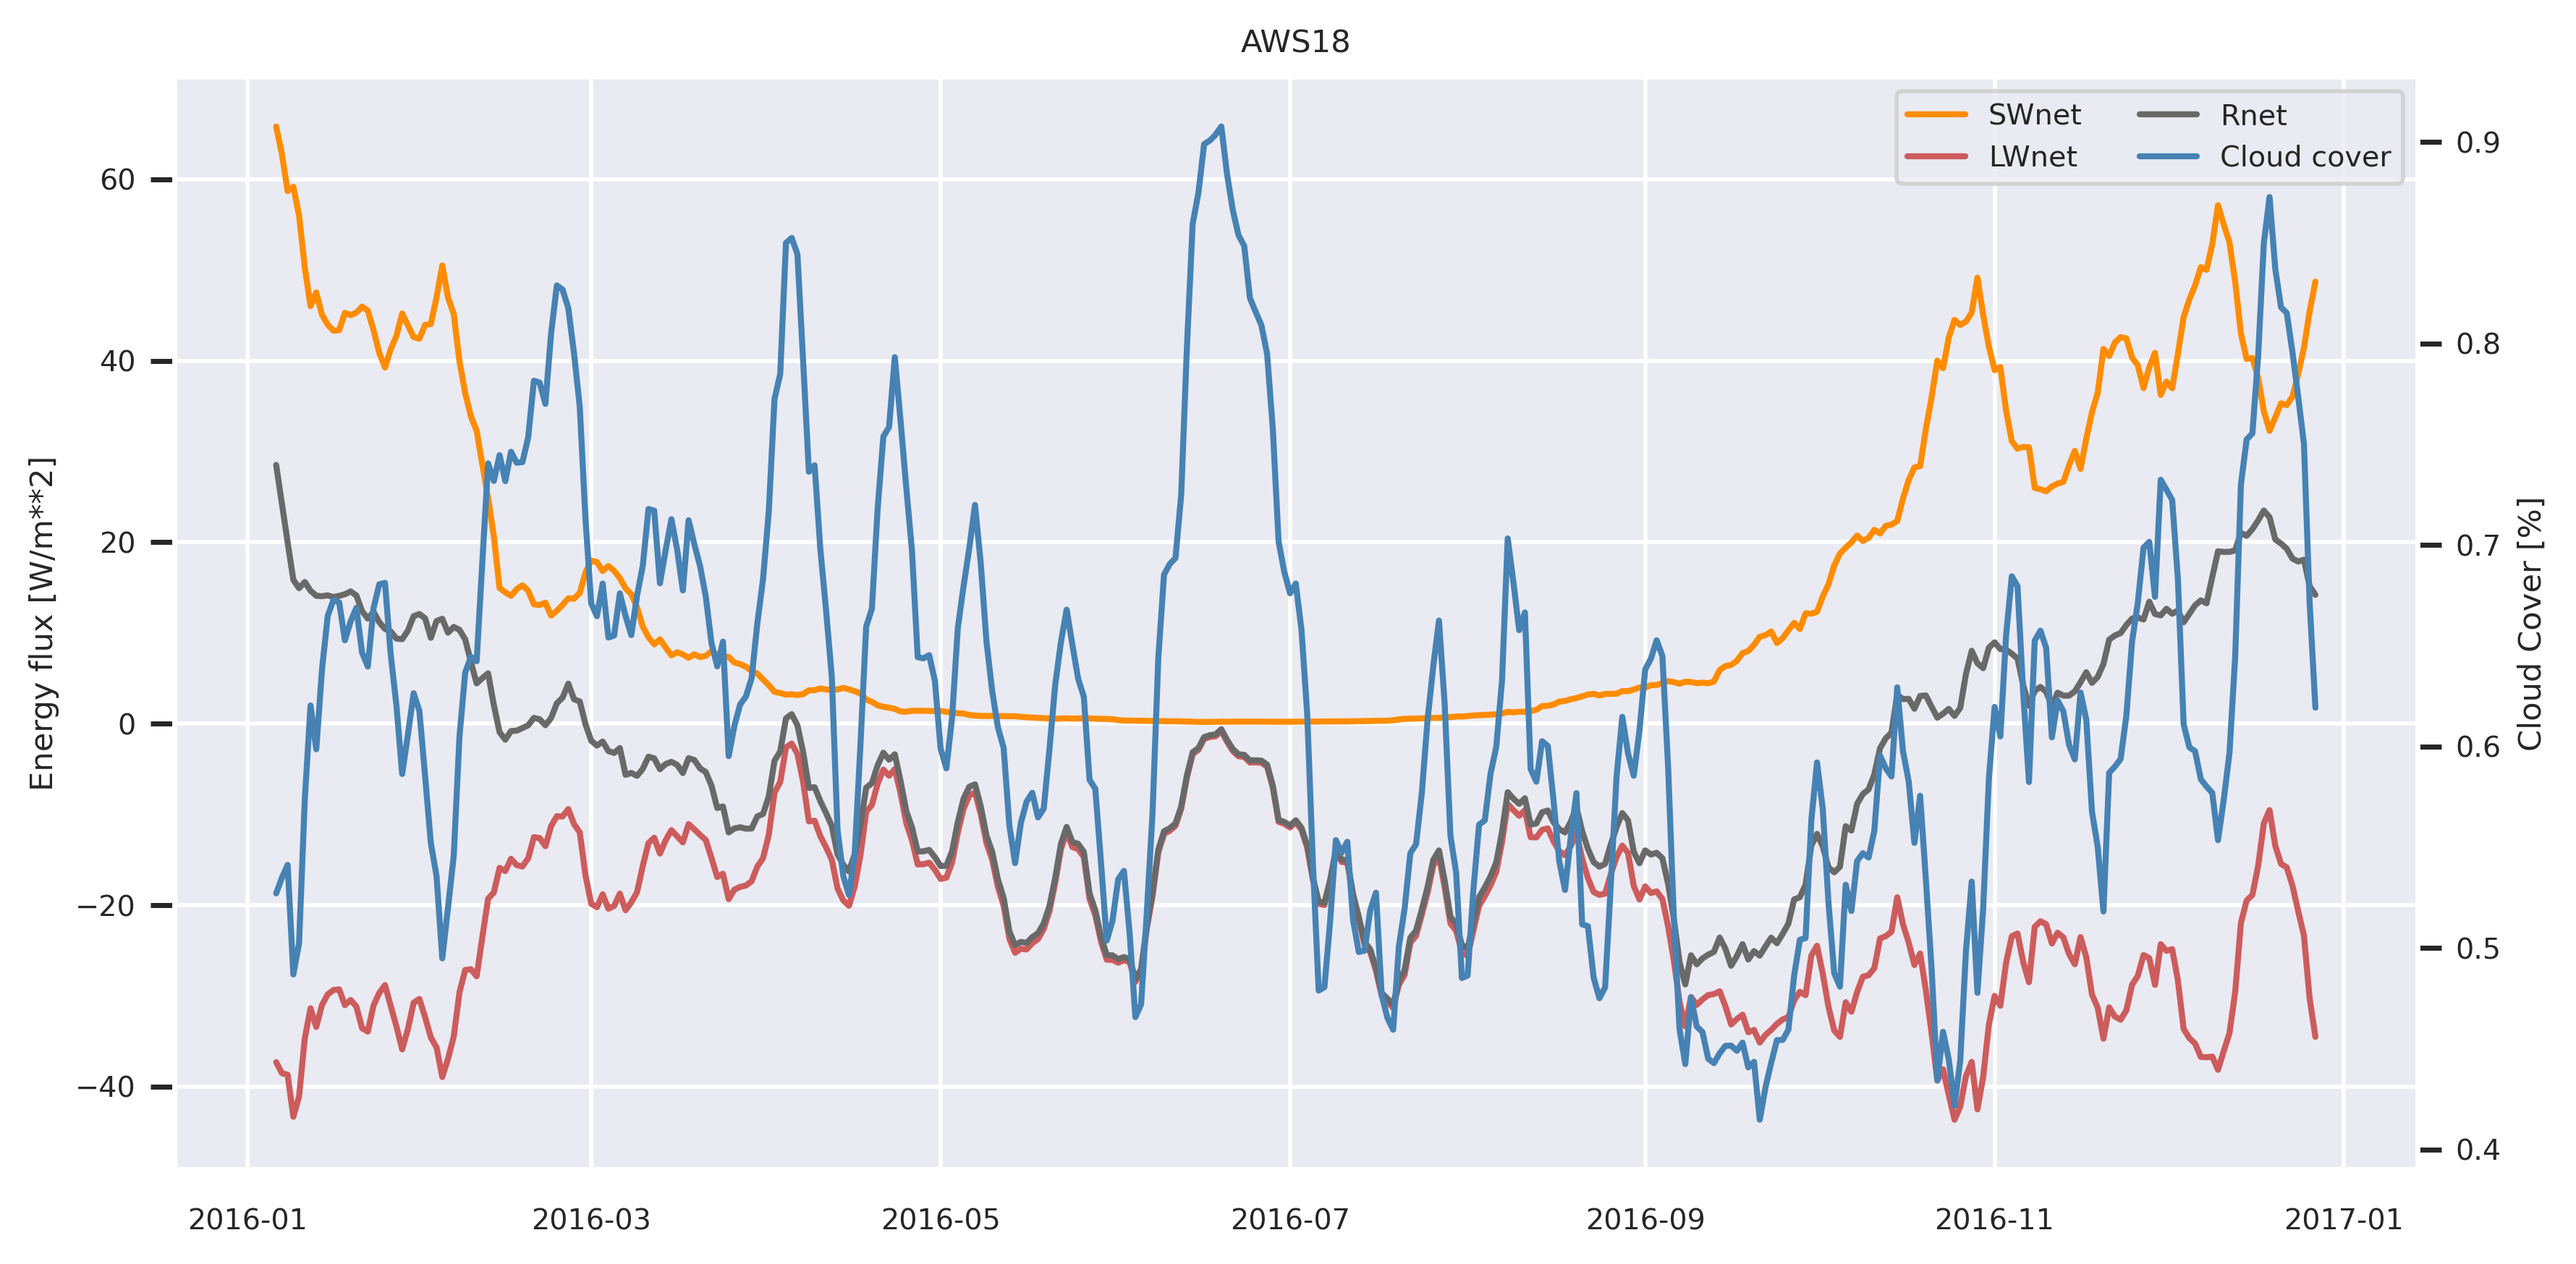

In [25]:
# subset and then smooth
aws18_df_subset = aws18_df.loc['2016-01-01':'2016-12-31']
aws18_df_subset = aws18_df_subset.rolling(10, center=True).mean()

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 5))

# Plot data (here we're also assigning variables to our plots so that we can reference them later on)
swnet = ax.plot(aws18_df_subset['Net SW [W/m**2]'], label="SWnet", color="darkorange")

lwnet = ax.plot(aws18_df_subset['Net LW [W/m**2]'], label="LWnet", color="indianred")

rnet = ax.plot(aws18_df_subset['NET [W/m**2]'], label="Rnet", color="dimgrey")

# Add additional data to a second y axis
ax2 = ax.twinx() # make second axis
ax2.grid(False) # turn its grid lines off

clouds = ax2.plot(aws18_df_subset['Cloud cov [%]'], label="Cloud cover", color="steelblue")

# Set title and labels for axes
ax.set(ylabel = 'Energy flux [W/m**2]', title='AWS18')
ax2.set(ylabel = 'Cloud Cover [%]')

# create a combined legend (needed because we have 2 y-axes)
lines = swnet+lwnet+rnet+clouds # create list of all lines
labs = [l.get_label() for l in lines] # loop through the list of lines and get their labels
legend = ax.legend(lines, labs, loc='upper right', ncol=2) # plot the legend

plt.show()

*** 

# Practice sessions

#### Question 1: Are the winter peaks in clouds associated with warm air advection?

Assess this by plotting 10-day rollng means of T2m and cloud cover for this year.

Recall:
* That we can subset a dataset that is indexed based on a parsed date field using `.loc['':'']` as shown above.
* Also, that in part 1 of this intro to Pandas, we called the `DataFrame.rolling` method and applied the `.mean()` function to calculate rolling means of data.
* Lastly, that we can create a second y axis on which to plot data using `ax2 = ax.twinx()`

In [26]:
# Add your code here 

#### Question 2: What's different when it's extremely cloudy vs when it's mostly clear?
1. Calculate the 5% and 95% percentile values for clouds. (hint: use the `DataFrame.quantile` function)
2. Subset the data based on these values
3. Calculate the difference in the descriptive statistics.


In [27]:
# Add your code here 

#### Question 3: Is there a seasonal effect on the effect of clouds on the surface meteorology?
1. Create two subsets of data: DJF of all years and JJA of all years. Then do the same as above:
    1. Calculate the 5% and 95% percentile values for clouds. (hint: use the `DataFrame.quantile` function)
    2. Subset the data based on these values
    3. Calculate the difference in the descriptive statistics in summer vs winter.


In [28]:
# Add your code here 